# 绘制图像的多种方法

在 Matplotlib 中绘制图像最常见的方法是使用 {func}`~matplotlib.axes.Axes.imshow` 函数。以下示例展示了 `imshow` 的大部分功能以及你可以创建的许多图像。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cbook as cbook
import matplotlib.cm as cm
from matplotlib.patches import PathPatch
from matplotlib.path import Path

# Fixing random state for reproducibility
np.random.seed(19680801)

首先，生成简单的二元正态分布。

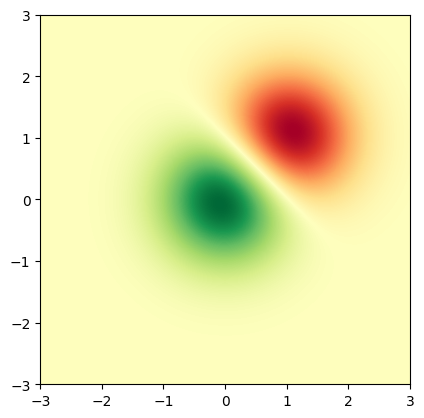

In [2]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()

也可以显示图片的图像：

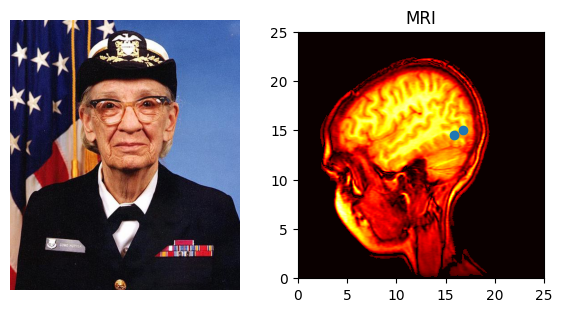

In [3]:
# A sample image
with cbook.get_sample_data('grace_hopper.jpg') as image_file:
    image = plt.imread(image_file)

# And another image, using 256x256 16-bit integers.
w, h = 256, 256
with cbook.get_sample_data('s1045.ima.gz') as datafile:
    s = datafile.read()
A = np.frombuffer(s, np.uint16).astype(float).reshape((w, h))
extent = (0, 25, 0, 25)

fig, ax = plt.subplot_mosaic([
    ['hopper', 'mri']
], figsize=(7, 3.5))

ax['hopper'].imshow(image)
ax['hopper'].axis('off')  # clear x-axis and y-axis

im = ax['mri'].imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)

markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)
ax['mri'].plot(x, y, 'o')

ax['mri'].set_title('MRI')

plt.show()

# 插值图像

在显示图像之前，也可以对图像进行插值。请注意，这可能会改变你的数据外观，但这对于实现你想要的外观可能是有帮助的。下面我们将显示相同的（小）数组，使用三种不同的插值方法进行插值。

像素中心 `A[i, j]` 绘制在 `(i+0.5, i+0.5)` 处。如果你使用的是 `'nearest'` 插值，那么由 `(i, j)` 和 `(i+1, j+1)` 界定的区域将具有相同的颜色。如果你使用的是插值，像素中心的颜色将与使用 `'nearest'` 时相同，但其他像素将在相邻像素之间进行插值。

```
  a b c d e
  f g h i j
  k l m n o
  p q r s t
  u v w x y
```
Matplotlib 在填充后的数组上计算插值和调整大小：
```
  a a b c d e e
  a a b c d e e
  f f g h i j j
  k k l m n o o
  p p q r s t t
  o u v w x y y
  o u v w x y y
```

然后提取结果的中心区域。（非常旧的 Matplotlib 版本（<0.63）不会填充数组，而是调整视图限制以隐藏受影响的边缘区域。）

这种方法允许在没有边缘效应的情况下绘制数组的全部范围，并且例如可以将不同大小的多个图像使用不同的插值方法叠加在一起——参见：[图层](layer_images)。这也意味着性能上的损失，因为必须创建这个新的临时填充数组。复杂的插值也意味着性能上的损失；为了获得最大性能或处理非常大的图像，建议使用 `interpolation='nearest'`。

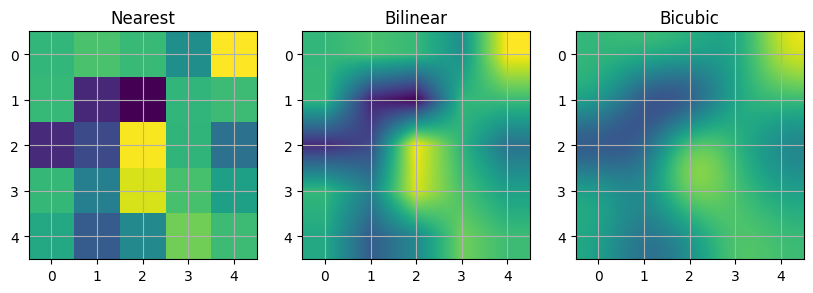

In [4]:
A = np.random.rand(5, 5)

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
    ax.imshow(A, interpolation=interp)
    ax.set_title(interp.capitalize())
    ax.grid(True)

plt.show()

你可以通过使用 `origin` 参数来指定图像是否应该以数组原点 `x[0, 0]` 在左上角或右下角进行绘制。你还可以在 `matplotlibrc` 文件中控制默认设置 `image.origin` （请参阅：[使用 `matplotlibrc` 文件进行定制](../explain/customizing.html#customizing-with-matplotlibrc-files)）。有关此主题的更多信息，请参阅[关于原点和范围的完整指南](https://matplotlib.org/stable/users/explain/artists/imshow_extent.html#imshow-extent)。

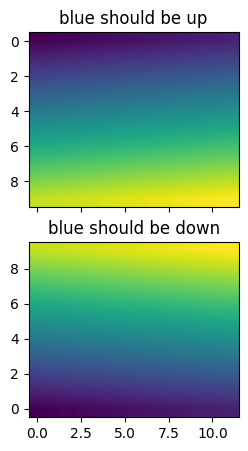

In [5]:
x = np.arange(120).reshape((10, 12))

interp = 'bilinear'
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(3, 5))
axs[0].set_title('blue should be up')
axs[0].imshow(x, origin='upper', interpolation=interp)

axs[1].set_title('blue should be down')
axs[1].imshow(x, origin='lower', interpolation=interp)
plt.show()

最后，我们将使用裁剪路径显示一张图像。

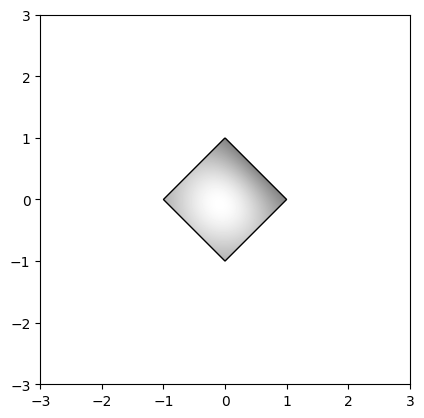

In [6]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

path = Path([[0, 1], [1, 0], [0, -1], [-1, 0], [0, 1]])
patch = PathPatch(path, facecolor='none')

fig, ax = plt.subplots()
ax.add_patch(patch)

im = ax.imshow(Z, interpolation='bilinear', cmap=cm.gray,
               origin='lower', extent=[-3, 3, -3, 3],
               clip_path=patch, clip_on=True)
im.set_clip_path(patch)

plt.show()


```{admonition} References
   - {func}`matplotlib.axes.Axes.imshow` / {func}`matplotlib.pyplot.imshow`
   - {func}`matplotlib.artist.Artist.set_clip_path`
   - {class}`matplotlib.patches.PathPatch`
```